## The Analysis of The Evolution of The Russian Comedy. Original Features

In this analysis,we will explore evolution of the French five-act comedy in verse based on the following features:

- The number of dramatic characters;
- The mobility coefficient;
- The standard range of the speaking characters (sigma);
- The percentage of non-dialogues;
- The percentage of polylogues;
- The percentage of monologues.

We will tackle the following questions:
1. We will explore feature correlations.
2. We will trace the development of the percentage of monologues, and polylogues and determine whether it is reasonable to combine them into one feature, i.e., the percentage of non-dialogues.
2. We will check the features for normality using Shapiro-Wilk normality test. This will help us determine whether parametric vs. non-parametric statistical tests are more appropriate. If the features are not normally distributed, we will use non-parametric tests. 
2. In our previous analysis of Sperantov's data, we discovered that instead of four periods of the Russian five-act tragedy in verse proposed by Sperantov, we can only be confident in the existence of two periods, where 1795 is the cut-off year. Therefore, we propose the following periods for the Russian verse comedy:
 - Period One (from 1775 to 1794)
 - Period Two (from 1795 to 1849).
3. We will run statistical tests to determine whether these two periods are statistically different.
3. We will create visualizations for each feature.
4. We will run descriptive statistics for each feature.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
def make_plot(feature, title):
    mean, std, median = summary(feature)
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=17)
    sns.distplot(feature, kde=False)
    mean_line = plt.axvline(mean, 
                            color='black',
                            linestyle='solid', 
                            linewidth=2); M1 = 'Mean';
    median_line = plt.axvline(median, 
                               color='green',linestyle='dashdot', 
                               linewidth=2); M2='Median'
    std_line = plt.axvline(mean + std, 
                           color='black',
                           linestyle='dashed', 
                           linewidth=2); M3 = 'Standard deviation';
    plt.axvline(mean - std, 
                color='black',
                linestyle='dashed', 
                linewidth=2)

    plt.legend([mean_line, median_line, std_line], [M1, M2, M3])
    plt.show()

In [3]:
def small_sample_mann_whitney_u_test(series_one, series_two):
    values_one = series_one.sort_values().tolist()
    values_two = series_two.sort_values().tolist()
    # make sure there are no ties  - this function only works for no ties
    result_df = pd.DataFrame(values_one + values_two, columns=['combined']).sort_values(by='combined')
    # average for ties
    result_df['ranks'] = result_df['combined'].rank(method='average')
    # make a dictionary where keys are values and values are ranks
    val_to_rank = dict(zip(result_df['combined'].values, result_df['ranks'].values))
    sum_ranks_one = np.sum([val_to_rank[num] for num in values_one])
    sum_ranks_two = np.sum([val_to_rank[num] for num in values_two])
    # number in sample one and two
    n_one = len(values_one) 
    n_two = len(values_two)
    # calculate the mann whitney u statistic which is the smaller of the u_one and u_two
    u_one = ((n_one * n_two) + (n_one * (n_one + 1) / 2)) - sum_ranks_one
    u_two = ((n_one * n_two) + (n_two * (n_two + 1) / 2)) - sum_ranks_two                     
    # add a quality check 
    assert u_one + u_two == n_one * n_two
    u_statistic = np.min([u_one, u_two])
    
    return u_statistic

In [4]:
def summary(feature):
    mean = feature.mean()
    std = feature.std()
    median = feature.median()
    
    return mean, std, median

In [5]:
# updated boundaries
def determine_period(row):
    if row <= 1794:
        period = 1
    else:
        period = 2
    
    return period

In [6]:
comedies = pd.read_csv('../Russian_Comedies/Data/Comedies_Raw_Data.csv')

In [7]:
# sort by creation date
comedies_sorted = comedies.sort_values(by='creation_date').copy()

In [8]:
# select only original comedies and five act
original_comedies = comedies_sorted[(comedies_sorted['translation/adaptation'] == 0) & 
                                   (comedies_sorted['num_acts'] == 5)].copy()

In [9]:
original_comedies.head()

,index,title,first_name,last_name,creation_date,translation/adaptation,num_acts,free_iambs,num_present_characters,num_scenes_text,...,percentage_open_scenes,percentage_scenes_rhymes_split_verse,num_stage_directions,stage_directions_frequency,num_word_tokens_in_stage_directions,average_length_of_stage_direction,num_verse_splitting_stage_directions,degree_of_verse_prose_interaction,number_scenes_with_discontinuous_change_characters,percentage_scenes_with_discontinuous_change_characters
0,R_1,Samoliubivyi stikhotvorets,Nikolai,Nikolev,1775,0,5,0,8,37,...,65.217,17.391,406,24.458,1102,2.714,161,9.699,3,6.667
1,R_2,Khvastun,Iakov,Kniazhnin,1785,0,5,0,14,50,...,47.273,14.545,356,17.298,893,2.508,104,5.053,2,3.636
3,R_4,Prestupnik ot igry ili bratom prodannaia sestra,Dmitrii,Efim’ev,1788,0,5,0,8,43,...,48.077,11.538,299,22.669,782,2.615,90,6.823,5,9.615
2,R_3,Chudaki,Iakov,Kniazhnin,1790,0,5,0,15,44,...,51.667,6.667,386,16.489,1078,2.793,139,5.938,2,3.333
4,R_5,Smekh i gore,Aleksandr,Klushin,1792,0,5,0,9,56,...,6.667,3.333,255,14.522,771,3.024,64,3.645,4,6.667


In [10]:
original_comedies.shape

(16, 38)

In [11]:
# rename column names for clarity
original_comedies = original_comedies.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                     'percentage_non_duologues': 'percentage_non_dialogues',
                                                      'percentage_above_two_speakers': 'percentage_polylogues'})

In [12]:
original_comedies.columns

Index(['index', 'title', 'first_name', 'last_name', 'creation_date',
       'translation/adaptation', 'num_acts', 'free_iambs',
       'num_present_characters', 'num_scenes_text', 'mobility_coefficient',
       'speech_distribution', 'percentage_monologues', 'percentage_duologues',
       'percentage_non_dialogues', 'percentage_polylogues',
       'av_percentage_non_speakers', 'sigma_iarkho', 'total_utterances',
       'num_verse_lines', 'rescaled_num_verse_lines', 'dialogue_vivacity',
       'num_scenes_with_split_verse_lines', 'num_scenes_with_split_rhymes',
       'percentage_scene_split_verse', 'percentage_scene_split_rhymes',
       'num_scenes_with_split_rhymes_verses', 'num_open_scenes',
       'percentage_open_scenes', 'percentage_scenes_rhymes_split_verse',
       'num_stage_directions', 'stage_directions_frequency',
       'num_word_tokens_in_stage_directions',
       'average_length_of_stage_direction',
       'num_verse_splitting_stage_directions',
       'degree_of_verse_p

In [13]:
comedies_iarkho_features = original_comedies[['index', 
                                               'title', 
                                               'first_name', 
                                               'last_name', 
                                               'creation_date',
                                               'num_present_characters',
                                               'mobility_coefficient',
                                               'sigma_iarkho',
                                               'percentage_monologues', 
                                               'percentage_non_dialogues', 
                                               'percentage_polylogues']].copy()

In [14]:
comedies_iarkho_features.head()

,index,title,first_name,last_name,creation_date,num_present_characters,mobility_coefficient,sigma_iarkho,percentage_monologues,percentage_non_dialogues,percentage_polylogues
0,R_1,Samoliubivyi stikhotvorets,Nikolai,Nikolev,1775,8,45,1.123,31.11,48.89,17.78
1,R_2,Khvastun,Iakov,Kniazhnin,1785,14,55,1.428,14.55,65.45,50.91
3,R_4,Prestupnik ot igry ili bratom prodannaia sestra,Dmitrii,Efim’ev,1788,8,52,0.862,42.31,57.69,15.38
2,R_3,Chudaki,Iakov,Kniazhnin,1790,15,60,1.190,16.67,55.00,38.33
4,R_5,Smekh i gore,Aleksandr,Klushin,1792,9,60,1.479,20.00,66.67,46.67


## Part 1. Feature Correlations

In [15]:
comedies_iarkho_features[['num_present_characters',
                           'mobility_coefficient',
                           'sigma_iarkho',
                           'percentage_monologues', 
                           'percentage_non_dialogues', 
                           'percentage_polylogues']].corr().round(2)

,num_present_characters,mobility_coefficient,sigma_iarkho,percentage_monologues,percentage_non_dialogues,percentage_polylogues
num_present_characters,1.00,0.56,0.38,-0.09,0.38,0.25
mobility_coefficient,0.56,1.00,-0.13,0.15,0.12,-0.07
sigma_iarkho,0.38,-0.13,1.00,-0.39,0.52,0.55
percentage_monologues,-0.09,0.15,-0.39,1.00,-0.33,-0.85
percentage_non_dialogues,0.38,0.12,0.52,-0.33,1.00,0.78
percentage_polylogues,0.25,-0.07,0.55,-0.85,0.78,1.00


Some features are moderately positively correlated: the number of dramatic characters and the mobility coefficient (0.56), the standard range of the number of speaking characters (sigma), and the percentage of non-dialogues (0.52), and the percentage of polylogues (0.55). The percentage of polylogues is moderately positively correlated with the standard range of the number of speaking characters (0.55).

The percentage of monologues and the percentage of polylogues are strongly negatively correlated (-0.85). The percentage of monologues is moderately negatively correlated with the standard range of the number of speaking characters (-0.39). 

There are also features that are weakly correlated, e.g., mobility coefficient and the percentage of monologues are weakly positively correlated (0.15), whereas the mobility coefficient and the percentage of polylogues are extremely weakly negatively correlated (-0.07).

## Part 2. The Percentage of Non-Dialogues, Polylogues, and Monologues

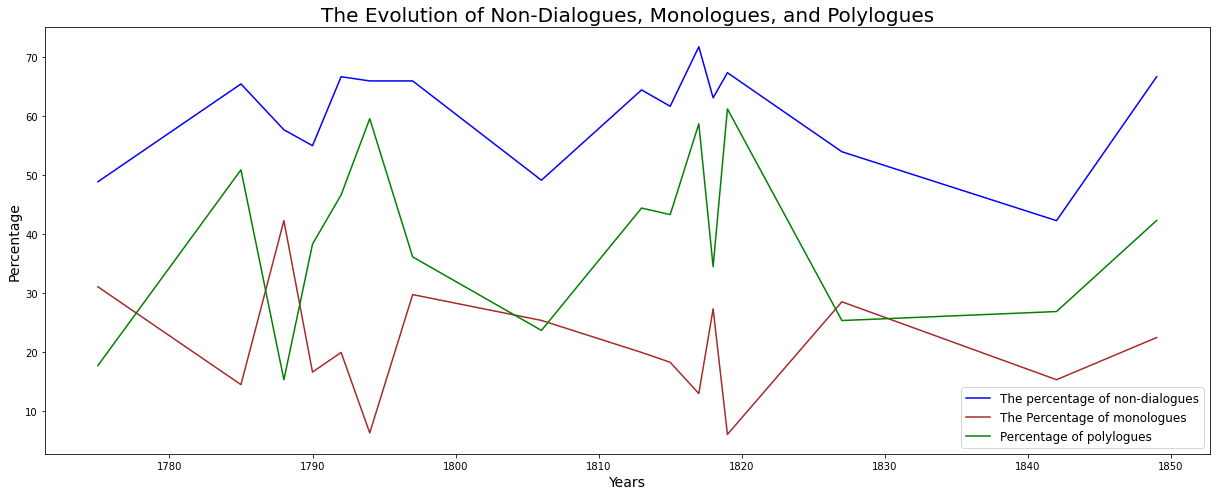

In [16]:
plt.figure(figsize=(17, 7))
plt.title('The Evolution of Non-Dialogues, Monologues, and Polylogues', fontsize=20)
plt.plot(comedies_iarkho_features['creation_date'], comedies_iarkho_features['percentage_non_dialogues'], color='b', label='The percentage of non-dialogues')
plt.plot(comedies_iarkho_features['creation_date'], comedies_iarkho_features['percentage_monologues'], color='brown', label='The Percentage of monologues')
plt.plot(comedies_iarkho_features['creation_date'], comedies_iarkho_features['percentage_polylogues'], color='green', label='Percentage of polylogues')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.tight_layout()
plt.show()

As was the case in the French corpus, the percentage of monologues and the percentage of polylogues had divergent evolution. The percentage of non-dialogues doesn't adequately reflect this development.

## Part 3. Feature Distributions and Normality

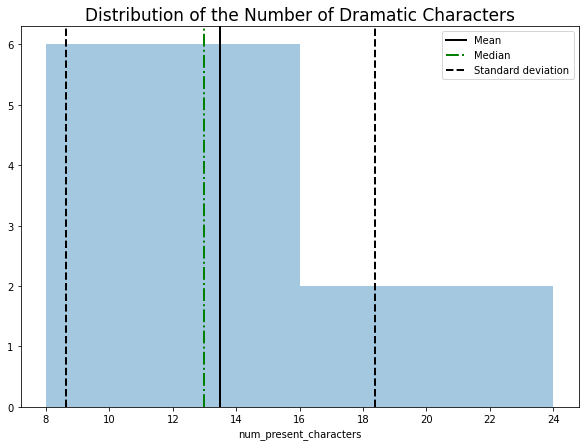

In [17]:
make_plot(comedies_iarkho_features['num_present_characters'], 
         'Distribution of the Number of Dramatic Characters')

### Shapiro-Wilk Normality Test

In [18]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_iarkho_features['num_present_characters'])[1])

The p-value of the Shapiro-Wilk normality test: 0.1045445129275322


The Shapiro-Wilk test showed that the probability of the number of dramatic characters of being normally distributed is 0.1045445129275322. This probability is above the 0.05, but the histogram does not appear to be bell-shaped.

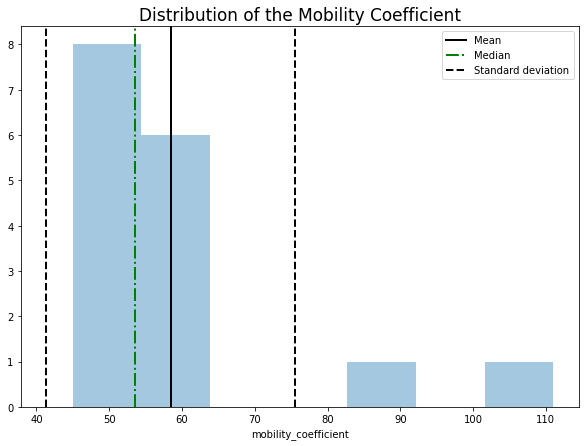

In [19]:
make_plot(comedies_iarkho_features['mobility_coefficient'], 
         'Distribution of the Mobility Coefficient')

In [20]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_iarkho_features['mobility_coefficient'])[1])

The p-value of the Shapiro-Wilk normality test: 0.0003138506435789168


The Shapiro-Wilk showed that the probability of the mobility coefficient of being normally distributed is 0.0003138506435789168. Since it is below the 0.05 significance level, we reject the hypothesis of the feature being normally distributed.

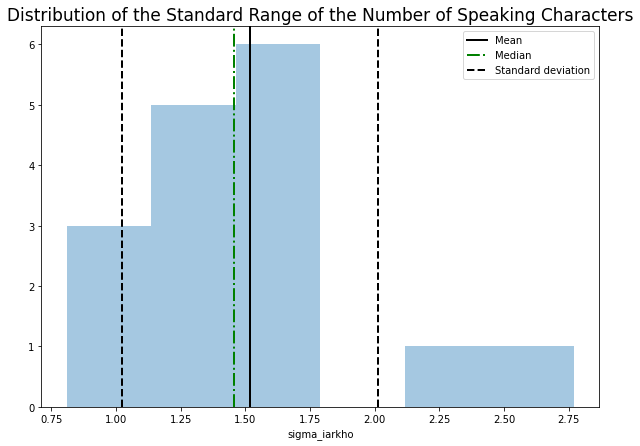

In [21]:
make_plot(comedies_iarkho_features['sigma_iarkho'], 
        'Distribution of the Standard Range of the Number of Speaking Characters')

In [22]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_iarkho_features['sigma_iarkho'])[1])

The p-value of the Shapiro-Wilk normality test: 0.10414231568574905


The Shapiro-Wilk test showed that the probability of the number of dramatic characters of being normally distributed is 0.10414231568574905. This probability is above the 0.05 significance level, but the histogram does not appear to be bell-shaped: there are a few comedies with sigma ranging between 2.25 and 2.75.

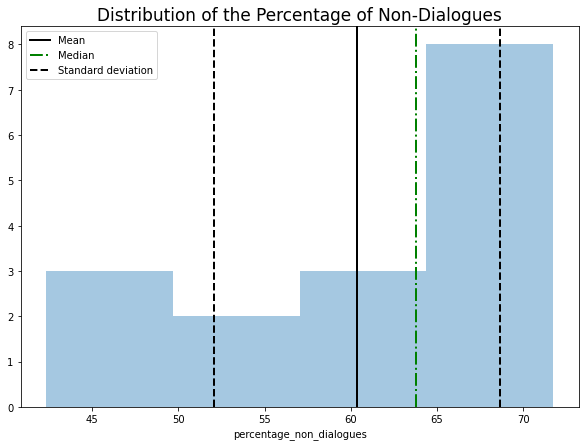

In [23]:
make_plot(comedies_iarkho_features['percentage_non_dialogues'], 
        'Distribution of the Percentage of Non-Dialogues')

In [24]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_iarkho_features['percentage_non_dialogues'])[1])

The p-value of the Shapiro-Wilk normality test: 0.08401014655828476


The Shapiro-Wilk test showed that the probability of the number of dramatic characters of being normally distributed is 0.08401014655828476, which the 0.05 significance level, but the histogram appears left-skewed: there are a few comedies with a lower percentage of non-dialogues.

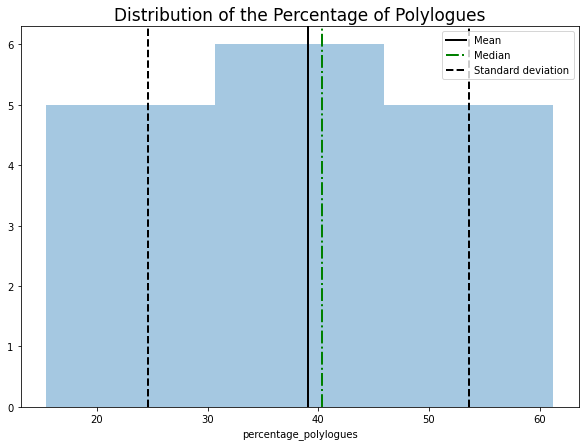

In [25]:
make_plot(comedies_iarkho_features['percentage_polylogues'], 
        'Distribution of the Percentage of Polylogues')

In [26]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_iarkho_features['percentage_polylogues'])[1])

The p-value of the Shapiro-Wilk normality test: 0.6103246808052063


The Shapiro-Wilk test showed that the probability of the percentage of polylogues of being normally distributed is very high (p-value = 0.6103246808052063). Therefore, we fail to reject the hypothesis of normal distribution.

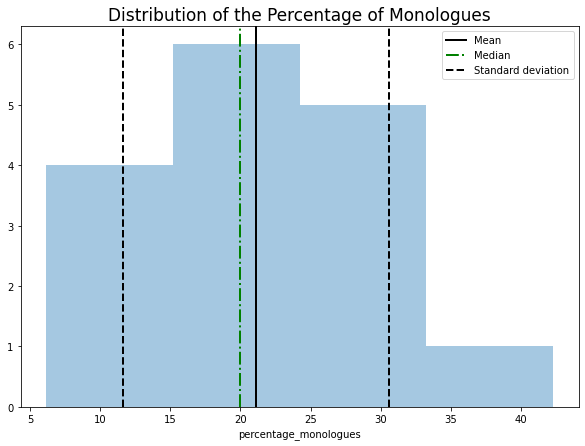

In [27]:
make_plot(comedies_iarkho_features['percentage_monologues'], 
        'Distribution of the Percentage of Monologues')

In [28]:
print('The p-value of the Shapiro-Wilk normality test:', 
      shapiro(comedies_iarkho_features['percentage_monologues'])[1])

The p-value of the Shapiro-Wilk normality test: 0.8529588580131531


The Shapiro-Wilk test showed that the probability of the percentage of polylogues of being normally distributed is extremele high (p-value = 0.8529588580131531). Therefore, we fail to reject the hypothesis of normal distribution.

### Summary:
1. We can be confident that two features (the percentage of polylogues and the percentage of monologues) are normally distributed. Therefore, a parametric test such as t-test is appropriate for these features.
2. We cannot be 100% confident that such features as the mobility coefficient, the number of dramatic characters, the standard range of the speaking characters, and the percentage of non-dialogues are normally distributed. For these features, we will err on the safe side and use a non-parametric test such as the Mann-Whitney test.

## Part 3. Hypothesis Testing

We will run statistical tests to determine whether the two periods distinguishable for the Russian five-act verse tragedy are significantly different for the Russian five-act comedy. The two periods are:
 - Period One (from 1747 to 1794)
 - Period Two (from 1795 to 1822)
 
For two features that are normally distributed (the percentage of polylogue and the percentage of monologues), we will use *scipy.stats* Python library to run a **t-test** to check whether there is a difference between Period One and Period Two. The null hypothesis is that there is no difference between the two periods. The alternative hypothesis is that the two periods are different, Our significance level will be set at 0.05. If the p-value produced by the t-test will be below 0.05. We will reject the null hypothesis of no difference. 


For other features, we will run **the Mann-Whitney u-test** to check whether there is a difference between Period One and Period Two. The null hypothesis will be no difference between these periods, whereas the alternative hypothesis will be that the periods will be different.

Since most of the periods have fewer than 20 tragedies, we cannot use the scipy's Man-Whitney u-test that requires each sample size to be at least 20 because it uses normal approximation. Instead, we will have to run Mann-Whitney U-test without a normal approximation for which we wrote a custom function. The details about the test can be found in the following resource: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html.

One limitation that we need to mention is the sample size. The first period has only six comedies and the second period has only ten. However, it is impossible to increase the sample size - we cannot ask the Russian playwrights of the eighteenth and nineteenth century to produce more five-act verse comedies.

In [29]:
comedies_iarkho_features['period'] = comedies_iarkho_features.creation_date.apply(determine_period)

In [30]:
period_one = comedies_iarkho_features[comedies_iarkho_features['period'] == 1].copy()
period_two = comedies_iarkho_features[comedies_iarkho_features['period'] == 2].copy()

In [31]:
period_one.shape

(6, 12)

In [32]:
period_two.shape

(10, 12)

## The T-Test

### The Percentage of Polylogues

In [33]:
from scipy.stats import ttest_ind

In [34]:
ttest_ind(period_one['percentage_polylogues'],
          period_two['percentage_polylogues'], equal_var=False)

Ttest_indResult(statistic=-0.1860466438891272, pvalue=0.856941480672258)

### The Percentage of Monologues

In [35]:
ttest_ind(period_one['percentage_monologues'],
          period_two['percentage_monologues'], equal_var=False)

Ttest_indResult(statistic=0.204599378260198, pvalue=0.8435936151754917)

### Summary

|Feature                    |p-value               |Result
|---------------------------| ----------------|--------------------------------
|  The percentage of polylogues |0.86 | Not Significant
|The percentage of monologues|0.84 | Not significant

## The Mann-Whitney Test

The Process:
- Our null hypothesis is that there is no difference between two periods. Our alternative hypothesis is that the periods are different.
- We will set the signficance level (alpha) at 0.05.
- We will run the test and calculate the test statistic.
- We will compare the test statistic with the critical value of U for a two-tailed test at alpha=0.05. Critical values can be found at https://www.real-statistics.com/statistics-tables/mann-whitney-table/.
- If our test statistic is equal or lower than the critical value of U, we will reject the null hypothesis. Otherwise, we will fail to reject it.

### The Number of Dramatic Characters¶

In [36]:
small_sample_mann_whitney_u_test(period_one['num_present_characters'],
                                 period_two['num_present_characters'])

19.5

### Mobility Coefficient¶

In [37]:
small_sample_mann_whitney_u_test(period_one['mobility_coefficient'],
                                 period_two['mobility_coefficient'])

25.5

### The Standard Range of the Number of Speaking Characters (Sigma)

In [38]:
small_sample_mann_whitney_u_test(period_one['sigma_iarkho'],
                                 period_two['sigma_iarkho'])

20.0

### The Percentage of Non-Dialogues

In [39]:
small_sample_mann_whitney_u_test(period_one['percentage_non_dialogues'],
                                 period_two['percentage_non_dialogues'])

27.0

### Critical Value of U

|Periods                      |Critical Value of U              
|---------------------------| ----------------
|  Period One (n=6) and Period Two (n=10) |11


### Summary

|Feature                    |u-statistic              |Result
|---------------------------| ----------------|--------------------------------
|  The number of dramatic characters |19.5 | Not Significant
|The mobility coefficient| 25.5| Not significant
|  The standard range of the number of speaking characters |20| Not significant
|  The percentage of non-dialogues |27| Not significant

For comedies, there is no evidence to suggest that the two periods are different based on any of the examined features. Of course, the small sample size, is something we should bear in mind: it is the factor that we couldn't change.

## Part 4. Visualizations

In [40]:
def scatter(df, feature, title, xlabel, text_y):
    sns.jointplot('creation_date', 
               feature,
               data=df, 
               color='b', 
               height=7).plot_joint(
               sns.kdeplot, 
               zorder=0, 
               n_levels=20)
    plt.axvline(1795, color='grey',linestyle='dashed', linewidth=2)
    plt.text(1795.5, text_y, '1795')
    plt.title(title, fontsize=20, pad=100)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(xlabel, fontsize=14)

    plt.show()

### The Number of Dramatic Characters¶

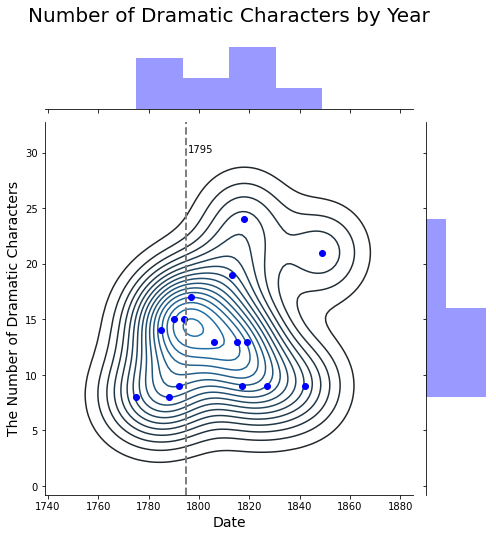

In [41]:
scatter(comedies_iarkho_features, 
        'num_present_characters', 
        'Number of Dramatic Characters by Year', 
        'The Number of Dramatic Characters',
         30)

### Mobility Coefficient

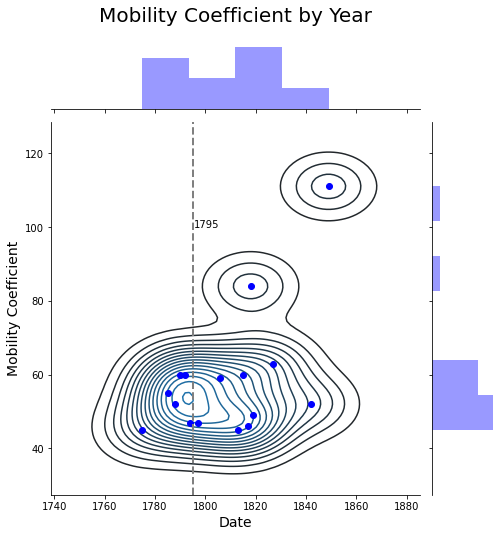

In [42]:
scatter(comedies_iarkho_features, 
        'mobility_coefficient', 
        'Mobility Coefficient by Year', 
        'Mobility Coefficient',
         100)

### Standard Range of the Number of Speaking Characters

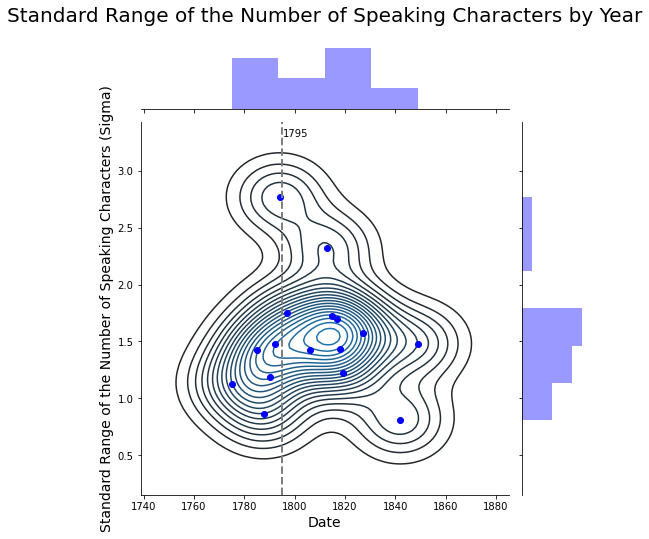

In [43]:
scatter(comedies_iarkho_features, 
        'sigma_iarkho', 
        'Standard Range of the Number of Speaking Characters by Year', 
        'Standard Range of the Number of Speaking Characters (Sigma)',
         3.3)

### The Percentage of Non-Dialogues

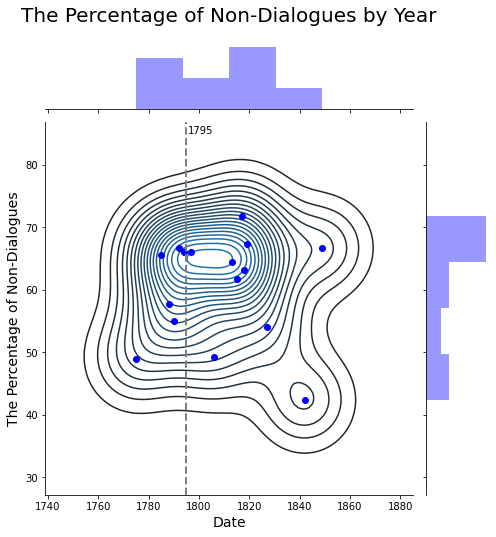

In [44]:
scatter(comedies_iarkho_features, 
        'percentage_non_dialogues', 
        'The Percentage of Non-Dialogues by Year', 
        'The Percentage of Non-Dialogues',
         85)

### The Percentage of Polylogues

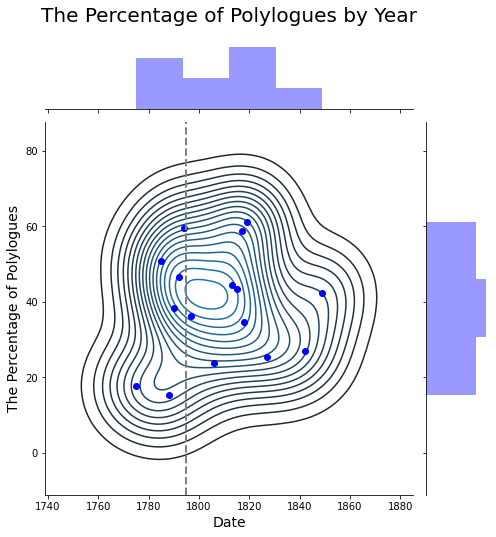

In [45]:
scatter(comedies_iarkho_features, 
        'percentage_polylogues', 
        'The Percentage of Polylogues by Year', 
        'The Percentage of Polylogues',
         93)

### The Percentage of Monologues¶

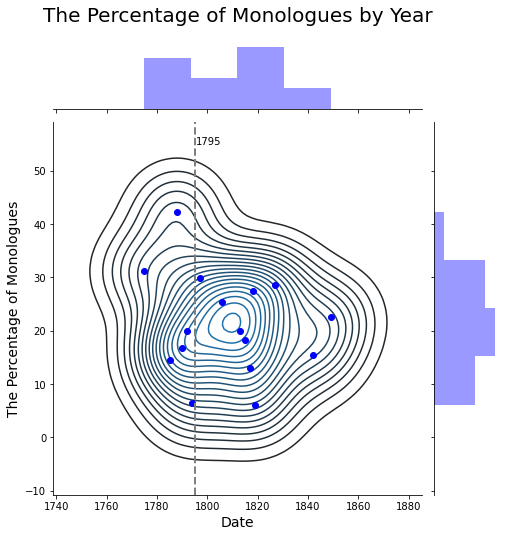

In [46]:
scatter(comedies_iarkho_features, 
        'percentage_monologues', 
        'The Percentage of Monologues by Year', 
        'The Percentage of Monologues',
         55)

## Part 5. Descriptive Statistics For Two Periods and Overall

### The Number of Dramatic Characters

#### In Entire Corpus

In [47]:
comedies_iarkho_features.describe().loc[:, 'num_present_characters'][['mean', 
                                                                    'std', 
                                                                    '50%',
                                                                    'min', 
                                                                    'max']].round(2)

mean    13.50
std      4.87
50%     13.00
min      8.00
max     24.00
Name: num_present_characters, dtype: float64

#### By  Tentative Periods

In [48]:
comedies_iarkho_features.groupby('period').describe().loc[:, 'num_present_characters'][['mean', 
                                                                                    'std', 
                                                                                    '50%',
                                                                                    'min', 
                                                                                    'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,11.5,3.51,11.5,8.0,15.0
2,14.7,5.33,13.0,9.0,24.0


### The Mobility Coefficient

#### In Entire Corpus

In [49]:
comedies_iarkho_features.describe().loc[:, 'mobility_coefficient'][['mean', 
                                                                    'std', 
                                                                    '50%',
                                                                    'min', 
                                                                    'max']].round(2)

mean     58.44
std      17.14
50%      53.50
min      45.00
max     111.00
Name: mobility_coefficient, dtype: float64

In [50]:
comedies_iarkho_features.groupby('period').describe().loc[:, 'mobility_coefficient'][['mean', 
                                                                                    'std', 
                                                                                    '50%',
                                                                                    'min', 
                                                                                    'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,53.17,6.37,53.5,45.0,60.0
2,61.60,20.91,55.5,45.0,111.0


In [51]:
comedies_iarkho_features.describe().loc[:, 'sigma_iarkho'][['mean', 
                                                            'std', 
                                                            '50%',
                                                            'min', 
                                                            'max']].round(2)

mean    1.52
std     0.49
50%     1.45
min     0.81
max     2.77
Name: sigma_iarkho, dtype: float64

#### By Tentative Periods

In [52]:
comedies_iarkho_features.groupby('period').describe().loc[:, 'sigma_iarkho'][['mean', 
                                                                            'std', 
                                                                            '50%',
                                                                            'min', 
                                                                            'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,1.48,0.67,1.31,0.86,2.77
2,1.54,0.39,1.53,0.81,2.32


### The Percentage of Non-Dialogues

#### In Entire Corpus

In [53]:
comedies_iarkho_features.describe().loc[:, 'percentage_non_dialogues'][['mean', 
                                                                    'std', 
                                                                    '50%',
                                                                    'min', 
                                                                    'max']].round(2)

mean    60.38
std      8.30
50%     63.77
min     42.31
max     71.74
Name: percentage_non_dialogues, dtype: float64

#### By Tenative Periods

In [54]:
comedies_iarkho_features.groupby('period').describe().loc[:,  'percentage_non_dialogues'][['mean', 
                                                                                        'std', 
                                                                                        '50%',
                                                                                        'min', 
                                                                                        'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,59.94,7.26,61.57,48.89,66.67
2,60.64,9.23,63.77,42.31,71.74


### The Percentage of Polylogues

In [55]:
comedies_iarkho_features.describe().loc[:, 'percentage_polylogues'][['mean', 
                                                                    'std', 
                                                                    '50%',
                                                                    'min', 
                                                                    'max']].round(2)

mean    39.09
std     14.53
50%     40.34
min     15.38
max     61.22
Name: percentage_polylogues, dtype: float64

In [56]:
comedies_iarkho_features.groupby('period').describe().loc[:,  'percentage_polylogues'][['mean', 
                                                                                        'std', 
                                                                                        '50%',
                                                                                        'min', 
                                                                                        'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,38.11,18.04,42.50,15.38,59.57
2,39.68,13.03,39.26,23.73,61.22


### The Percentage of Monologues

In [57]:
comedies_iarkho_features.describe().loc[:, 'percentage_monologues'][['mean', 
                                                                    'std', 
                                                                    '50%',
                                                                    'min', 
                                                                    'max']].round(2)

mean    21.10
std      9.50
50%     20.00
min      6.12
max     42.31
Name: percentage_monologues, dtype: float64

In [58]:
comedies_iarkho_features.groupby('period').describe().loc[:,  'percentage_monologues'][['mean', 
                                                                                        'std', 
                                                                                        '50%',
                                                                                        'min', 
                                                                                        'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,21.84,12.86,18.34,6.38,42.31
2,20.65,7.60,21.26,6.12,29.79


### Summary:
1. The average number of dramatic characters in the Russian five-act verse comedy was 13.5. The standard deviation was 4.87. During the tentative period one, the mean number of dramatic characters was 11.5, whereas during the tentative period two, it grew to 14.7. The standard deviation also increased from 3.51 to 5.33.
2. The mean mobility coefficient in the corpus of the Russian five-act verse comedy was 58.44, the standard deviation was 17.14. During the tentative Period One, the mobility coefficient was 53.17. During Period Two, it increased to 61.60. The standard deviation more than threefold: from 6.37 to 20.91.
3. For the corpus, the mean standard range of the number of speaking characters was 1.52, the standard deviation was 0.49. In Period One, the mean standard range was 1.48, in Period Two, it was 1.54. However, the standard deviation of the standard range decreased from 0.67 to 0.39. 
4. In the entire corpus, the mean percentage of non-dialogues was 60.38%, the standard deviation was 8.3. In the tentative Period One, the mean percentage of non-dialogues was 59.94% and it was 60.64%. The standard deviation increased from 7.26 in Period One to 9.23 in Period Two.
5. In the corpus of the Russian five-act comedy in verse, the mean percentage of polylogues was 39.09%. The standard deviation was 14.53. In tentative Period One, the mean percentage of polylogues was 38.11% and in Period Two, it was 39.68%. The standard deviation decreased from 18.04 to 13.03. 
6. The mean percentage of monologues in the entire corpus was 21.10%. The standard deviation was 9.5. In the tentative Period One, it was 21.84%. In Period Two, it decreased to 20.65%. The standard deviation also decreased from 12.86 to 7.6.

## Conclusions:
1. Two out of the examined features (the percentage of polylogues and the percentage of monologues) are normally distributed.
2. There is no evidence to suggest that the two periods of the Russian five-act comedy in verse (Period One (from 1775 to 1794) and Period Two (from 1795 to 1849)) are significantly different based on any of the examined features.
3. The mean values of all examined features (except for the percentage of monologues) increased from tentative Period One to Period Two.